In [7]:
import random
from typing import List
import importlib

import tensorflow.keras as keras
import matplotlib.pyplot as plt

import config
from model import losses
# from utils import callbacks
from train import make_datasets, compile_model, get_callbacks

In [6]:
pathlist = config.TR_MAP_PATH.glob("*.png")
pathlist = [path.name for path in pathlist]
random.shuffle(pathlist)

# テストのため1/4のデータでやってみる
nb_tr = int(len(pathlist) * 0.2)
nb_va = int(len(pathlist) * 0.1)
tr_pathlist = pathlist[:nb_tr]
va_pathlist = pathlist[nb_tr:]

train_ds, valid_ds = make_datasets(
    tr_path=tr_pathlist,
    va_path=tr_pathlist,
    use_cutmix=True,
)
# print(args.epochs)


(64, 256, 256, 3)
(64, 256, 256, 1)


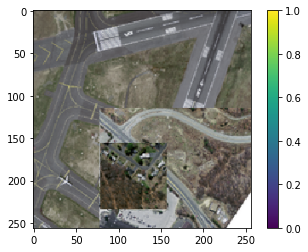

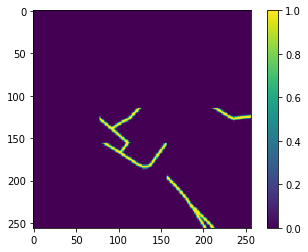

In [8]:
for i,t in train_ds.take(1):
    print(i.shape)
    print(t.shape)
    plt.imshow(i[0])
    plt.colorbar()
    plt.show()
    plt.imshow(t[0])
    plt.colorbar()
    plt.show()

In [9]:
loss = losses.TverskyLoss(name="Tversky", alpha=0.7)
model = compile_model(loss=loss)
## 訓練
filename = "augument_test"
model_history = model.fit(
    train_ds,
    epochs=2,
    validation_data=valid_ds,
    steps_per_epoch=config.STEPS_PER_EPOCH,
    validation_steps=5,
    callbacks=get_callbacks(filename),
)


Epoch 1/2
133/133 [==============================] - 86s 589ms/step - loss: 0.6361 - mean_io_u: 0.4956 - val_loss: 0.8885 - val_mean_io_u: 0.4894

Epoch 00001: saving model to /results/211126/checkpoints/augument_test/augument_test
Epoch 2/2
133/133 [==============================] - 77s 581ms/step - loss: 0.4211 - mean_io_u: 0.5640 - val_loss: 0.9934 - val_mean_io_u: 0.4888

Epoch 00002: saving model to /results/211126/checkpoints/augument_test/augument_test


In [ ]:
print(model_history.history.keys())
tr_loss = model_history.history["loss"]
va_loss = model_history.history["val_loss"]
tr_iou = model_history.history["mean_io_u"]
va_iou = model_history.history["val_mean_io_u"]

plt.figure()
plt.title("mean IoU")
plt.plot(tr_iou, "r")
plt.plot(va_iou, "bo")
plt.show()

plt.title("loss")
plt.plot(tr_loss, "r")
plt.plot(va_loss, "bo")
plt.show()


In [ ]:
for i,t in valid_ds.take(3):
    pred = model.predict(i)
    plt.imshow(i[0])
    plt.show()
    plt.imshow(t[0])
    plt.show()
    plt.imshow(pred[0])
    plt.show()